In [2]:
# mengimport library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# megimport dataset
df = pd.read_csv('house.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df = df.drop(columns=['date','id'])
df.shape

(21613, 19)

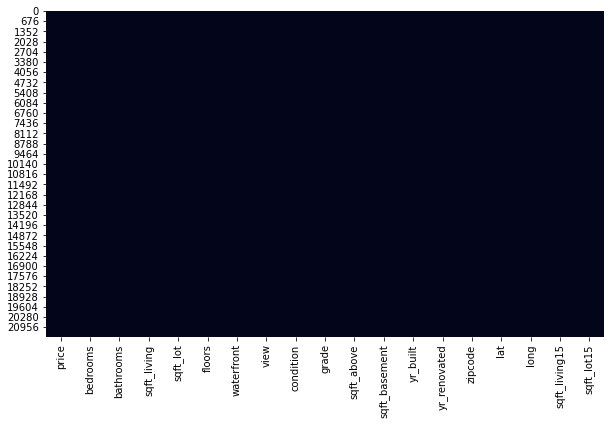

In [5]:
# melihat data yang ksoong
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),cbar = False);

In [7]:
# melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

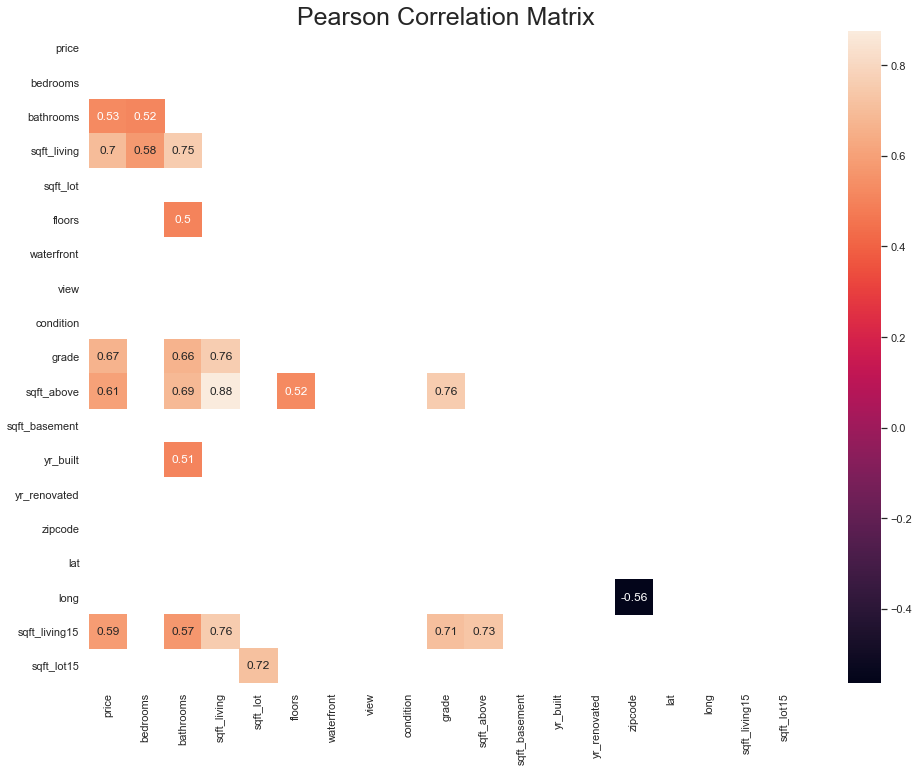

In [62]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)
corr2 = df[features].corr()
corr3 = df.corr()
sns.heatmap(corr3[(corr3 >= 0.5)|(corr3 <= -0.5)],mask=mask,annot =True);

## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [14]:
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

lr = LinearRegression()
X_train = np.array(df['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(df['price'], dtype=pd.Series).reshape(-1,1)
lr.fit(X_train,y_train)

X_test = np.array(df['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(df['price'], dtype=pd.Series).reshape(-1,1)

In [15]:

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = format(r2_score(y_test,y_pred),'.3f')
rmse = float(format(np.sqrt(mean_squared_error(y_test,y_pred)),'.3f'))
score = format(lr.score(X_test,y_test),'.3f')
print('Slope : ',lr.coef_)
print('Intercept : ',lr.intercept_)
print('MSE : ',mse)
print('r2_score : ',r2)
print('rmse :',rmse)
print('RSquare :',score)

Slope :  [[280.6235679]]
Intercept :  [-43580.74309447]
MSE :  68351286833.039825
r2_score :  0.493
rmse : 261440.79
RSquare : 0.493


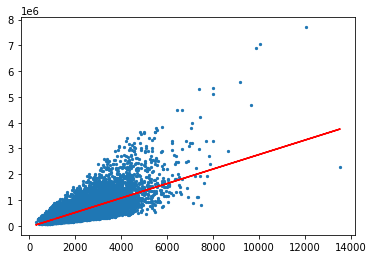

In [30]:
plt.scatter(X_test,y_test,s=5)
plt.plot(X_test,y_pred,color='r')

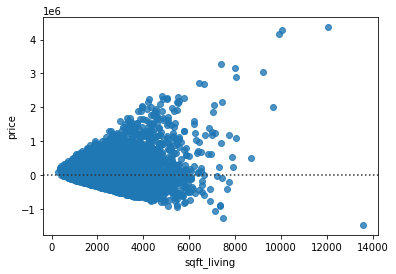

In [9]:
sns.residplot(df['sqft_living'],df['price'])

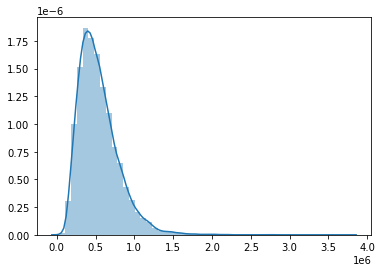

In [31]:
sns.distplot(y_pred)

### Transform Data

In [16]:
from sklearn.preprocessing import PowerTransformer

In [55]:
trans = PowerTransformer(method='box-cox')
trans.fit(X_train)
X_train_pt = trans.transform(X_train)
X_test_pt = trans.transform(X_test)

In [56]:
trans.fit(y_train)
y_train_pt = trans.transform(y_train)
y_test_pt = trans.transform(y_test)
y_pred_pt = trans.transform(y_pred)

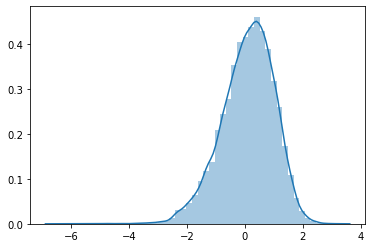

In [57]:
sns.distplot(y_pred_pt)

## Polynomial

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [24]:
evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Root Mean Squared Error (RMSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[]})

features = ['sqft_living']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(X_train)
X_testpoly = polyfeat.transform(X_test)
poly = lr.fit(X_trainpoly, y_train)
pred1 = poly.predict(X_testpoly)
rmsepoly1 = float(format(np.sqrt(mean_squared_error(y_test,pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,y_train),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,y_test),'.3f'))
cv = float(format(cross_val_score(lr,X_allpoly,df['price'],cv=5).mean(),'.3f'))

In [27]:
print('RMSE : ',rmsepoly1)
print('Skor R train poly : ',rtrpoly1)
print('Skor R test poly : ',rtepoly1)
print('Skor Cross Validation : ',cv)

RMSE :  250948.368
Skor R train poly :  0.533
Skor R test poly :  0.533
Skor Cross Validation :  0.521
